In [ ]:
#Recursive function review

In [ ]:
# Recrusion is where you call a function within itself, in order to solve complicated tasks in a simpler way
# def a_function():
#     ...
#     if ... :
#          a_function()

In [1]:
# Reverse a string
# reverse_string("hello") -> "olleh"
def reverse_string(s):
    # base: empty string, or a string of length 1
    if len(s) <= 1:
        return s
    else:
        # Recursive case: reverse of s is: reverse(s[1:]) + s[0] : reverse("ello") + h 
        return reverse_string(s[1:]) + s[0]

In [2]:
reverse_string("hello")

'olleh'

In [10]:
# Calculate the power of number using recursion
# exponent can not be negative
# pre-condition: exponent needs to be an integer
def power(base, exponent):
    #base case:
    if exponent == 0:
        return 1
    else: 
        # recursive
        return base * power(base, exponent-1)

In [22]:
# Count occurances in a list
# return if value is inside list (using recursion, and not using "in")
# Returns True/False
def is_value_inside_list(lst, value):
    if len(lst) == 0:
        return False
    else:    
        return (lst[0] == value) or is_value_inside_list(lst[1:], value)

def count_value_inside_lst(lst, value):
    if len(lst) == 0:
        return 0
    else:
        if lst[0] == value:
            return 1 + count_value_inside_lst(lst[1:], value)
        else:
            return count_value_inside_lst(lst[1:], value)
            

In [23]:
is_value_inside_list([1, 2, 3, 4, 5, 6, 7, 8], 9)

False

In [25]:
count_value_inside_lst([1, 2, 3, 4, 5, 5, 5, 6, 5, 6, 7, 8], 0)

0

In [29]:
#Leetcode style question 1:
# You are climbing a staircase. It takes n steps to reach the top.
# Each time you can either climb 1 step or 2 steps. 
# What are the distinct ways can you reach the top?
def climb_stairs(n: int) -> int:
    pathways = []
    climb_stairs_rec(n, pathways, [])
    return pathways

def climb_stairs_rec(n: int, pathways: list, current_pathway: list):
    if n == 0:
        if len(current_pathway) != 0:
            pathways.append(current_pathway)
    else:
        if n >= 2:
            climb_stairs_rec(n-2, pathways, current_pathway + [2])
            climb_stairs_rec(n-1, pathways, current_pathway + [1])
        else:
            climb_stairs_rec(n-1, pathways, current_pathway + [1])
            
            

    

In [33]:
len(climb_stairs(15))

987

In [36]:
#Leetcode style question 2:
# Do binary search over a list (nums is sorted)
def binary_search(nums: list[int], target: int) -> int:
    return binary_search_rec(nums, target, 0, len(nums))


def binary_search_rec(nums, target, start, end):
    if end - start == 0:
        return -1
    elif end - start == 1:
        if nums[start] == target:
            return start
        else:
            return -1
    else:
        midpoint = (end+start)//2
        if nums[midpoint] == target:
            return midpoint
        elif nums[midpoint] < target:
            # our target is on the right side
            return binary_search_rec(nums, target, midpoint+1, end)
        else:
            # our target is on the left side
            return binary_search_rec(nums, target, start, midpoint)

In [40]:
binary_search([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 18, 20, 59, 100], 60)

-1

# Recursive Data Structures

## Outline

-   Trees

-   Anatomy, tree traversal methods

-   Binary Search Trees

-   Graphs

-   Nearest Neighbor Problem

# Trees

## Introduction to Trees

-   Not all data has a natural linear order. Organization charts and
    file storage systems have a *hierarchical structure*, in which each
    entity is linked to multiple entities below it

-   This type of data is represented using a *tree*. A tree is either

    -   Empty

    -   Has a *root value* connected to any number of other trees,
        called *subtrees*

-   We draw the root at the top of the tree

## Anatomy of a Tree

-   The *size* of a tree is the number of values in the tree

-   A *leaf* is a value with no subtrees. The leaves of this tree are
    labeled E, F, G, J, and I

-   The *height* of a tree is the longest path from its root to its
    leaves. The height of this tree is 4

![](./images/tree.png)

## Anatomy of a Tree

-   The *children* of a value are all values directly connected
    underneath that value. The children of A are B, C, and D

-   The *descendants* of a value are it’s children, the children of its
    children, etc. This can be defined recursively

-   The *parent* of a value is the value immediately above and connected
    to it. The parent of H is C

-   The *ancestors* of a value are its parent, the parent of its parent,
    etc.

![](./images/tree.png)

## Tree Traversal Methods

-   Linear data structures only have one logical way to traverse them.
    Trees can be traversed in different ways

-   We’ll look at the following methods of tree traversal and their
    applications

    -   *Depth First Search* (DFS): Inorder, Preorder, and Postorder
        traversal

    -   *Breadth First Search* (BFS)

-   Note there are other methods not covered

## DFS: Inorder Traversal

1.  Traverse the left subtree

2.  Visit the root

3.  Traverse the right subtree

**Result: 4 2 5 1 6 3**

![](./images/tree_num.png)

## DFS: Inorder Traversal Code

Let’s look at the code to do this
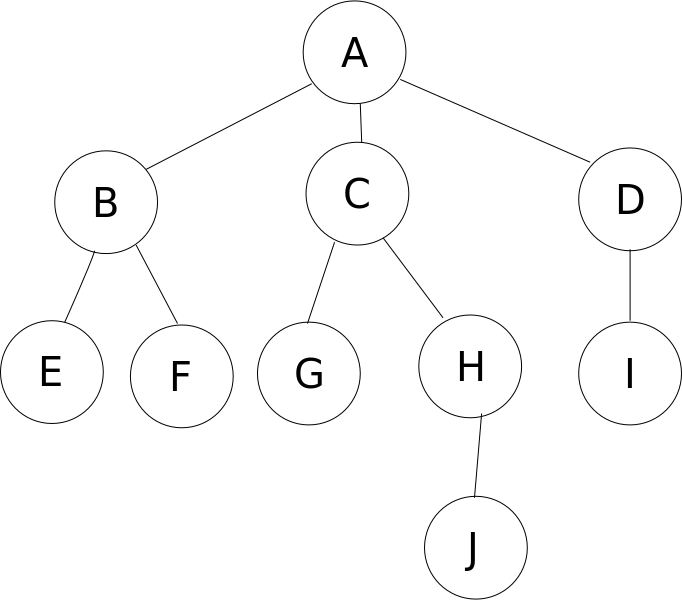
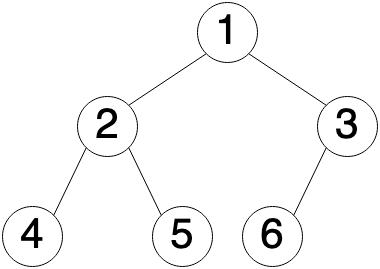

In [50]:
class Node:
  """Tree class
  """
  def __init__(self, key):
    self.left = None
    self.right = None
    self.val = key
    
def print_inorder(root):
  if root:
    print_inorder(root.left)
    print(root.val, end = " ")
    print_inorder(root.right)

def print_preorder(root):
  if root:
    print(root.val, end = " ")
    print_preorder(root.left)
    print_preorder(root.right)

def print_postorder(root):
  if root:
    print_postorder(root.left)
    print_postorder(root.right)
    print(root.val, end = " ")

## DFS: Inorder Traversal Code

In [51]:
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
print_inorder(root) #4 2 5 1 6 3

4 2 5 1 6 3 

In [52]:
print_preorder(root) 

1 2 4 5 3 6 

In [53]:
print_postorder(root) 

4 5 2 6 3 1 

In binary search trees (next section), inorder traversal gives the nodes
in a non-decreasing order.

## DFS: Inorder Traversal Complexity

Time complexity

-   Each node is visited exactly once. The work done at each node is
    constant. $O(n)$

Space complexity

-   Dependent on the maximum depth of the recursion, which is the height
    of the tree. $O(h)$

## DFS: Preorder Traversal

1.  Visit the root

2.  Traverse the left subtree

3.  Traverse the right subtree

**Result: 1 2 4 5 3 6**

Preorder traversal is used to create a copy of the tree

![](./images/tree_num.png)

## DFS: Postorder Traversal

1.  Traverse the left subtree

2.  Traverse the right subtree

3.  Visit the root

**Result: 4 5 2 6 3 1**

Preorder traversal is used to delete subtrees. (why?)

![](./images/tree_num.png)

## BFS

BFS (or Level Order Traversal) traverses nodes present in the same level
before traversing the next level

1.  For each node

-   The node is visited

-   The child nodes are enqueued in a FIFO queue

1.  First node is dequeued

2.  Child nodes are enqueued

3.  Repeat until the queue is empty

**Result: 1 2 3 4 5 6**

![](./images/tree_num.png)

# Binary Search Trees

## BST Definitions

-   You can think of a BST as a sorted tree

-   A *binary tree* is a tree in which every item has at most two
    subtrees

    -   The tree used in illustrating DFS and BFS methods is a binary
        tree

-   A binary tree is a *binary search tree property* if its value is
    greater than or equal to all items in the left subtree and its value is less than all items in the right subtree

-   A binary tree is a *binary search tree* if every item in the tree
    satisfies the binary search tree property

## BST Efficiency

-   Consider the BST on the right. Verify that it is a BST.

-   The worst-case run time is $O(h)$, $h$ being the height of the tree

    -   So the tree on the right is $O(n)$

-   A tree of height $h$ can have at most $2^h - 1$ nodes. So we need at
    least log$n$ height to store all of them.

    -   So if the tree was balanced, then it would be $O(\text{log}n)$

![](./images/tree_unbal.png)

## BST Efficiency

-   Convince yourself that for a balanced BST the search, insert, and
    delete Big-O is all $O(\text{log}n)$

-   Ensuring that a tree is balanced is important

    -   Red-Black trees (not covered) are trees that balance themselves

    -   You may also be interested in B-trees, which are used in
        databases

## Live Coding

Given a BST, insert a new node in this BST.

![](./images/insertion.png)

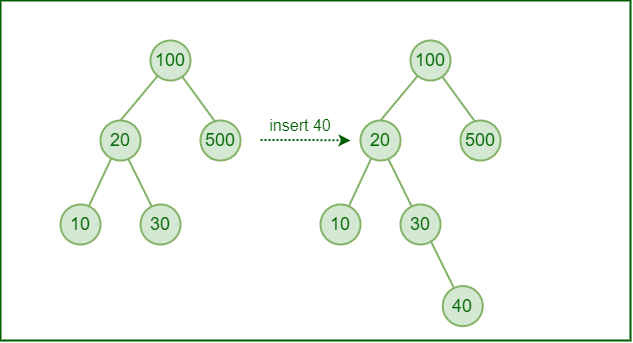
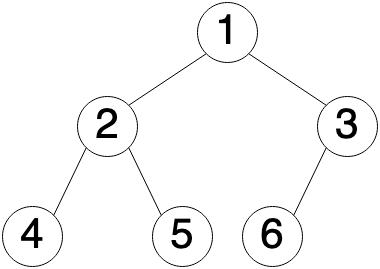
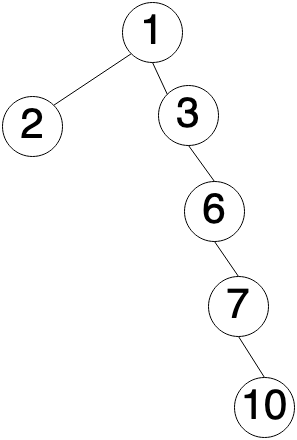

In [54]:
# Your code here
class Node:
  """Tree class
  """
  def __init__(self, key):
    self.left = None
    self.right = None
    self.val = key
    

In [57]:
root = Node(100)
root.left  = Node(20)
root.left.left = Node(10)
root.left.right = Node(30)
root.right = Node(500)


In [60]:
def bst_insert(root, value):
    if root:
        if root.val >= value:
            if root.left:
                bst_insert(root.left, value)
            else:
                root.left = Node(value)
        else:
            if root.right:
                bst_insert(root.right, value)
            else:
                root.right = Node(value)
    else:
        return Node(value)

In [61]:
bst_insert(root, 40)

In [62]:
root.left.right.right.val

40

In [63]:
print_inorder(root)

10 20 30 40 100 500 


# Graphs

## Introduction

-   We looked at lists and trees, which represent linear and
    hierarchical relationships respectively

    -   But many relationships are neither

    -   Friend networks, internet connections, flight connections

-   Graphs consist of two parts, *nodes* and *edges*

    -   A node connected to another is a *neighbor*

![](./images/graph_anat.png)

## Types of Graphs

There are directed and undirected graphs to represent different
situations

-   Friendships: undirected

-   Twitter followers: directed

-   Who owes who money: directed

-   Note that trees are special cases of directed graphs

Graphs can also be weighted, to differentiate strengths between nodes

There are two questions we ask about graphs: Is there a path from node A
to B? What is the shortest path from node A to B? BFS answers both!

![](./images/graph_weight.png)

## BFS of Graphs

-   *Breadth First Search* (BFS) searches graph for a node that meets a
    set of criteria. It starts at the root of the graph and visits all
    nodes at the current depth level before moving on to the nodes at
    the next depth level

    -   If there are multiple nodes meeting the criteria, then BFS will
        also find the nearest node!

-   The issue is that graphs contain *cycles*, so we may visit the same
    node more than once

    -   Let’s split nodes into visited and not visited

-   We use a list to keep track of visited nodes

-   All the adjacent unvisited nodes of the current level are pushed
    into the queue and the nodes of the current level are marked visited
    and popped from the queue

-   Is BFS a recursive or iterative graph search method?

## BFS Example

-   Let’s traverse a graph with BFS starting at node “1”

-   Visited list and queue start as empty

Visited: \[ , , , , \]

Queue: \[ , , , , \]

![](./images/graph_bfs.png)

## BFS Example

-   We’re at node 1, so we push it onto the visited list and push it
    onto the queue

Visited: \[1, , , , \]

Queue: \[1, , , , \]

![](./images/graph_bfs.png)

## BFS Example

-   Now we visited 1, so it is dequeued.

-   At the first level away from node 1, there is 3 and 6.

-   We visit 3 and 6, but we have not visited any of it’s neighbors
    (other than 1), so 3 and 6 are enqueued.

Visited: \[1, 3, 6, , \]

Queue: \[3, 6, , , \]

![](./images/graph_bfs.png)

## BFS Example

-   Visit the neighbors of node 3, so we dequeue it

-   But we need to enqueue 10, because we haven’t visited its neighbors

Visited: \[1, 3, 6, 10, \]

Queue: \[6, 10, , \]

![](./images/graph_bfs.png)

## BFS Example

-   Visit the neighbors of node 6, which is just 7, so we dequeue it

-   But we need to enqueue 7

Visited: \[1, 3, 6, 10, 7\]

Queue: \[10, 7, , \]

![](./images/graph_bfs.png)

## BFS Example

-   Visit the neighbors of node 10, and dequeue 10

-   But we already visited those nodes, so the visited list does not
    change

Visited: \[1, 3, 6, 10, 7\]

Queue: \[7, , , , \]

![](./images/graph_bfs.png)

## BFS Example

-   Visit neighbors of 7, which are also all visited

-   The queue is empty, so the algorithm ends

Visited: \[1, 3, 6, 10, 7\]

Queue: \[ , , , , \]

![](./images/graph_bfs.png)

## Time and Space Complexity of BFS

-   Each edge and each node must be visited once, so the time complexity
    is $O(n + e)$

-   Since we need to store each node of the graph by the end of the
    algorithm, the space complexity is $O(n)$

## Implementing Graphs and BFS

We can represent graphs using the *adjacency list* representation

-   Other options include adjacency matrix or using a Python library

In [66]:
from collections import deque

class Graph:
  def __init__(self):
    self.graph = {}

  def add_edge(self, vertex, neighbors):
    self.graph[vertex] = neighbors

## Implementing Graphs and BFS

In [67]:
def bfs(graph, start):
  visited = set()
  queue = deque([start])

  while queue:
    current_vertex = queue.popleft()

    if current_vertex not in visited:
      # Process the current vertex
      print(current_vertex, end=' ')
      visited.add(current_vertex)

      # Enqueue unvisited neighbors
      for neighbor in graph.graph.get(current_vertex, []):
        if neighbor not in visited:
          queue.append(neighbor)

## Implementing Graphs and BFS

In [68]:
# Represent graph from above
ex_graph = Graph()
ex_graph.add_edge(1, [3, 6])
ex_graph.add_edge(3, [10, 6])
ex_graph.add_edge(6, [3, 7])
ex_graph.add_edge(10, [3, 7])
ex_graph.add_edge(7, [10, 6])

# Perform BFS starting from vertex 1
bfs(ex_graph, 1)

1 3 6 10 7 

## Recursive Graph Search: Preorder Traversal

-   Using the same `Graph` class, let’s implement preorder traversal

In [69]:
def recursive_preorder_traversal(graph, start, visited=None):
  if visited is None:
    visited = set()

  # Process the current vertex
  print(start, end=' ')
  visited.add(start)

    # Recursive traversal of neighbors
  for neighbor in graph.graph.get(start, []):
    if neighbor not in visited:
      recursive_preorder_traversal(graph, neighbor, visited)

## Recursive Graph Search: Preorder Traversal

In [70]:
bfs(ex_graph, 1)

1 3 6 10 7 

# Nearest Neighour Problem

## Nearest Neighbour Problem

-   As you may have encountered already, machine learning and
    statistical methods often depend on finding the nearest neighbor to
    a data point

    -   K-nearest neighbors regression, propensity score matching

-   In a $k$ dimensional space, if we conduct a linear search for
    points, the running time will be $O(kn)$ for $n$ data points.

-   Can we do better?

## k-d Trees

-   k-d trees is short for k dimensional tree (notation is a bit
    unfortunate, different K than KNN)

    -   It is useful for multidimensional searches

-   Let’s discuss the properties of k-d trees and why they work

-   Binary tree where each node represents an axis-aligned
    hyperrectangle in the k-dimensional space

    -   hyperrectangle: rectangle in higher dimensions

-   Nodes in the left subtree have coordinates less than the splitting
    dimension of the current node, while nodes in the right subtree have
    coordinates greater than the splitting dimension.

-   At each level of the tree, a specific dimension is chosen to split
    the data. The choice of dimension alternates as we traverse down the
    tree.

-   Each leaf represents a single point in the k-dimensional space

## k-d Trees Animation

<https://commons.wikimedia.org/wiki/File:KDTree-animation.gif>

## Applications and Issues

-   Notice k-d trees can also find values within a certain range very
    quickly, not just a specific point

-   GIS (geographic information systems) queries

-   KNN algorithm

-   Computer graphics, such as ray tracing to facilitate efficient space
    partitioning

-   Issues occur in high-dimensional spaces and trees can become
    imbalanced

# Recommended Problems and References

## Recommended Readings

-   Bhargava: Chapter 6

-   Bhargava: Chapter 11, pages 203 to 206 about Trees

## Recommended Problems

-   Cormen: Chapter 10 exercises

    -   10.3-1, 10.3-2, 10.3-3

-   Bhargava: Chapter 6 exercises

    -   6.1 to 6.5

## Recommended Problems

-   Implement preorder, postorder, and level order traversal. Determine
    the time and space complexity in each case

-   Implement a function that find an element in a BST and deletes it.
    The descendants of the deleted node are given to the deleted node’s
    parent.

-   Using the `graph` class from the slides, implement BST search such
    that it stops and tell you the distance the node is from the
    starting point.

    -   For instance, if we searched for 7 in the graph given in the
        slides, it would return `"Found! Distance 2"`.

    -   If we searched for 100 in the graph, it would return
        `"Not found!"`

-   Implement postorder graph traversal using the `graph` class from the
    slides.

-   Implement a function using recursion to find the sum heterogeneous
    nested lists such as \[\[1, \[2\]\], \[\[\[3\]\]\], 4, \[\[5, 6\],
    \[\[\[7\]\]\]\]\].

## References

-   Bhargava, A. Y. (2016). *Grokking algorithms: An illustrated guide
    for programmers and other curious people.* Manning. Chapter 6, 10,
    11.

-   Cormen, T. H. (Ed.). (2009). *Introduction to algorithms* (3rd ed).
    MIT Press. Chapter 12 and 20.

-   Horton, D., & Liu, D. (2023, November 19). *CSC148 Lecture Notes*.
    https://www.teach.cs.toronto.edu/~csc148h/winter/notes/